# **Importing Required Libraries**

In [93]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [29]:
# Read the "insurance.csv" file
insurance_data = pd.read_csv("insurance.csv")

In [21]:
# Use the head() function to display the first 5 rows of the data
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
# Getting some information from the data
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**We have 3 Categorical features**


*   sex
*   smoker
*   region





In [23]:
# checking for missing values
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [24]:
# Statistical summary of quantitative data
insurance_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# **Exploratory Data Analysis**
 Let's analyze the data and draw meaningful conclusions from the data.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


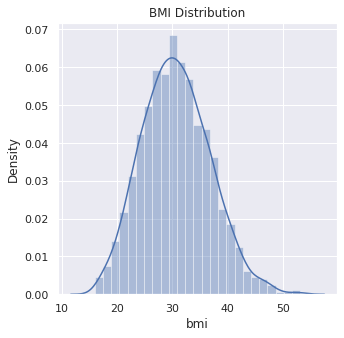

In [25]:
# We examine the distribution of Bmi (Body Mass Index)
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(insurance_data['bmi'])
plt.title("BMI Distribution")
plt.show()

**Graphic Interpretation:**

From the analyzes above we can see the BMI is normally distributed i.e. It follows a Normal Distribution

In [ ]:
# We examine the relationship between “smoker” and “charges”

Text(0.5, 1.0, 'Charges for Smokers')

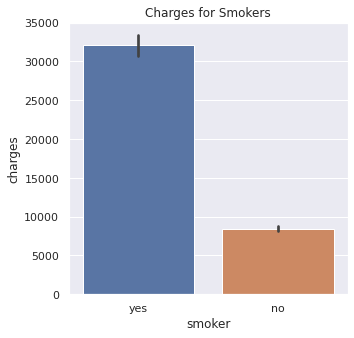

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x='smoker', y='charges', data=insurance_data)
plt.title("Charges for Smokers")

**Graphic Interpretation:**


We see from the barplot above that we have an higher number of people who smoke compare to those who don't and those who smoke are charged higher.

In [ ]:
# We examine the relationship between “smoker” and “region”.

(array([325.,   0.,   0., 364.,   0.,   0., 325.,   0.,   0., 324.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

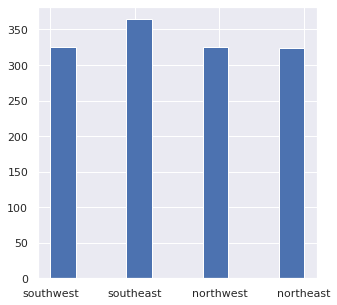

In [ ]:
plt.figure(figsize=(5,5))
plt.hist(x='region',  data=insurance_data)

Text(0.5, 1.0, 'BMI vs Sex')

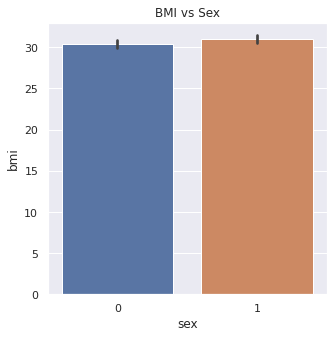

In [97]:
# We examine the relationship between “bmi” and “sex”.

plt.figure(figsize=(5,5))
sns.barplot(x='sex', y='bmi', data=insurance_data)
plt.title("BMI vs Sex")

**Graphic Interpretation:**

Male and female have almost the same bmi. Male is a little bit greater.

In [ ]:
# We examine the relationship between “age” and “bmi”.

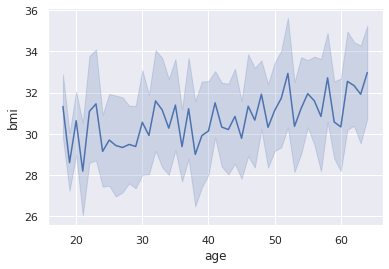

In [ ]:
sns.lineplot(x="age", y='bmi',data = insurance_data)
plt.show()

Text(0.5, 1.0, 'Charges for Smokers')

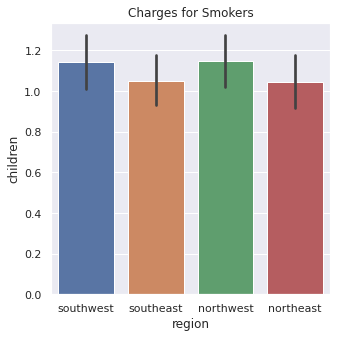

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x='region', y='children', data=insurance_data)
plt.title("Charges for Smokers")

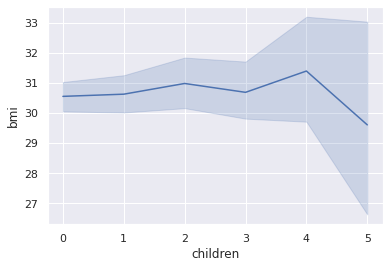

In [ ]:
sns.lineplot(x="children", y='bmi',data = insurance_data)
plt.show()

# **Data Preprocessing**

**Label Encoding techniques.**

In [30]:
# Create an LabelEncoder object
lab_encode = LabelEncoder()

# Encode the features to integers inside a for loop
for e in insurance_data[["sex", "smoker"]]:
    insurance_data[e] = lab_encode.fit_transform(insurance_data[e])


**One-Hot Encoding technique**

In [31]:
# Create an One-hot encoding object
one_hot_encode = pd.get_dummies(insurance_data["region"])

# combine the two DataFrames using their column names
insurance_data = pd.concat([insurance_data, one_hot_encode], axis=1)

# drop the "region" column
insurance_data.drop("region", axis=1, inplace=True)

# check to see data is all quantitative
insurance_data.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


**Separate Dataset into features and target**

In [32]:
# Create the X variable for features
X = insurance_data.drop("charges", axis=1)

# Create the y variable for target 
y = insurance_data.loc[:, "charges"]

**Split dataset into X_train,X_test, y_train, y_test.**

In [35]:
# Split the dataset into train and test sets with 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Scale the dataset by normalizing it(Min-Max Scaling or Standard Scaling).**

In [36]:
# We use the Min-Max Scaling

# Create an object using the MinMaxScaler() class
scaler = MinMaxScaler()

# We scale just the independent variables
X_train = scaler.fit_transform(X_train)
X_train[0:5]
X_test = scaler.fit_transform(X_test)
X_test[0:5]

array([[0.58695652, 0.        , 0.23374808, 0.4       , 0.        ,
        1.        , 0.        , 0.        , 0.        ],
       [0.39130435, 0.        , 0.36921571, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.28156018, 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.60869565, 1.        , 0.24968545, 0.6       , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.02173913, 1.        , 0.42234028, 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        ]])

# **Model Selection**
Select several regression models and train them with the preprocessed data.

*   Linear Regression Model
*   Decision Tree Regression Model
*   Random Forest Regression Model
*   Support Vector Machine Model





In [40]:
# Create an object using the LinearRegression() class
lin_reg_model = LinearRegression()

# Create an object using the DecisionTreeRegressor() class
dec_tree_model = DecisionTreeRegressor()

# Create an object using the RandomForestRegressor() class
rand_forest_model = RandomForestRegressor()

# Create an object using the SVR() class
svm_model = SVR()


**Examine the performances of the selected models using cross validation.**

In [41]:
# The performances of lin_reg_model
lin_reg_score = cross_val_score(lin_reg_model,
                                X_train, y_train,
                                scoring= "neg_mean_squared_error",
                                cv=10)

# The performances of dec_tree_model
dec_tree_score = cross_val_score(dec_tree_model,
                                X_train, y_train,
                                scoring= "neg_mean_squared_error",
                                cv=10)

# The performances of rand_forest_model
rand_forest_score = cross_val_score(rand_forest_model,
                                X_train, y_train,
                                scoring= "neg_mean_squared_error",
                                cv=10)

# The performances of svm_model
svm_score = cross_val_score(svm_model,
                                X_train, y_train,
                                scoring= "neg_mean_squared_error",
                                cv=10)


**Choosing the best performing model**

In [43]:
# Define a function to print out the performance of all the models

def display_performance(performance):
  performance = np.sqrt(-performance)
  print(f"""
  RMSE: {performance}
  Mean: {performance.mean()}
  Standard Deviation : {performance.std()}
  """)

In [44]:
# Display performance of lin_reg_model
display_performance(lin_reg_score)


  RMSE: [6077.44989665 6580.87166754 5233.82683473 6045.25239632 5836.4647871
 6127.43525895 7280.37393616 6298.16858791 6193.3145481  5660.60480453]
  Mean: 6133.376271799343
  Standard Deviation : 517.5318567882914
  


In [45]:
# Display performance of dec_tree_model
display_performance(dec_tree_score)


  RMSE: [6459.75014765 6512.37493142 7039.46862995 6557.40960636 7215.86581839
 5944.76223646 6928.5740491  6802.84015516 6777.59337663 5959.78779227]
  Mean: 6619.842674339408
  Standard Deviation : 402.18165304856217
  


In [46]:
# Display performance of rand_forest_model
display_performance(rand_forest_score)


  RMSE: [4764.17501676 5280.93200826 3782.40729703 4412.77555419 5208.01730394
 4938.93482205 5499.74988544 5520.29537807 5070.5222615  4666.70545513]
  Mean: 4914.451498237708
  Standard Deviation : 507.1716988017759
  


In [47]:
# Display performance of svm_model
display_performance(svm_score)


  RMSE: [12527.55657891 12477.53529947 12822.95627471 14495.04256846
 13002.65880912 10418.83021956 12320.74963324 12153.30642099
 12935.57208746 12258.97310757]
  Mean: 12541.318099949585
  Standard Deviation : 951.4602172803403
  


**RandomForestRegressor has the lowest RMSE,**
**We continue with RandomForestRegressor** 

# **Hyper-parameter Optimization**

**Optimize the hyper-parameters of RandomForestRegressor**

---





In [68]:
params = {"n_estimators": [3,10,30,50,79,88,97],
             "n_jobs": [2,3,4,10,20,40,79]}

**Optimize parameters with Grid Search**

In [69]:
grid_search = GridSearchCV(rand_forest_model, params,
                           cv=5,
                           scoring="neg_mean_squared_error")

In [70]:
grid_search.fit(X_train,y_train);
# We train it with our train dataset

In [72]:
# check for best parameter
grid_search.best_params_

{'n_estimators': 79, 'n_jobs': 20}

**We have n_estimators = 79 and n_jobs = 20**

# **Prediction**
*   We can now make predictions



In [75]:
# We make predictions using test dataset
predict = grid_search.best_estimator_.predict(X_test)

# Compare predictions from test dataset with the actual dataset
compare = pd.DataFrame({"Actual Charges": y_test[0:10].values,
                        "Predicted Charges": predict[0:10]})
compare

,Actual Charges,Predicted Charges
0,9095.06825,10363.496732
1,5272.17580,5016.891033
2,29330.98315,27970.745931
3,9301.89355,13394.091232
4,33750.29180,34309.767138
5,4536.25900,9150.068118
6,2117.33885,2143.264258
7,14210.53595,14606.547906
8,3732.62510,6074.152930
9,10264.44210,10751.879504


**From the DataFrame above we see that some value are really close to each other but let's Evaluate the RandomForestRegressor model to see how well it works**

# **Model Evaluation**
Evaluate the optimized model using regression model evaluation metrics.
*   Mean Squared Error
*   R-Square
*   Mean Absolute Error

In [95]:
# Define a function to evaluate the predictions

def regression_model_evaluation(predict):
  mse = mean_squared_error(y_test, predict)
  rmse = np.sqrt(mse)
  r_square = r2_score(y_test, predict)
  mae = mean_absolute_error(y_test, predict)

  print(f"""Mean Absolute Error: {mae}
            Mean Square Error: {mse}
            Root Mean Square Error: {rmse}
            R Square Value: {r_square}
  """)


In [96]:
# Call the function
regression_model_evaluation(predict)

Mean Absolute Error: 2566.7094241750974
            Mean Square Error: 21780798.678840008
            Root Mean Square Error: 4666.99032341401
            R Square Value: 0.8597038541342661
  
